In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [3]:
df.rename(columns={'Weight':'weight'},inplace=True)

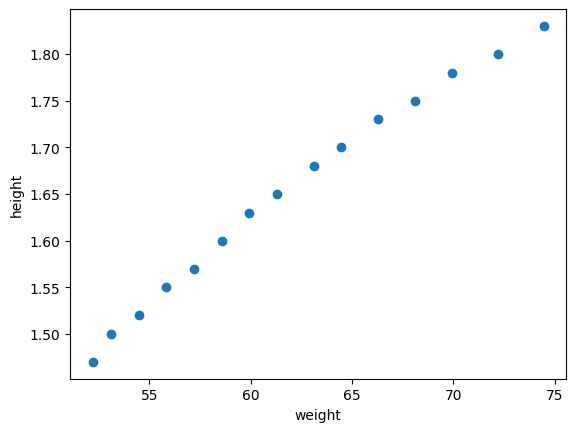

In [4]:
plt.scatter(df['weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [5]:
df.corr()

,Height,weight
Height,1.000000,0.994584
weight,0.994584,1.000000


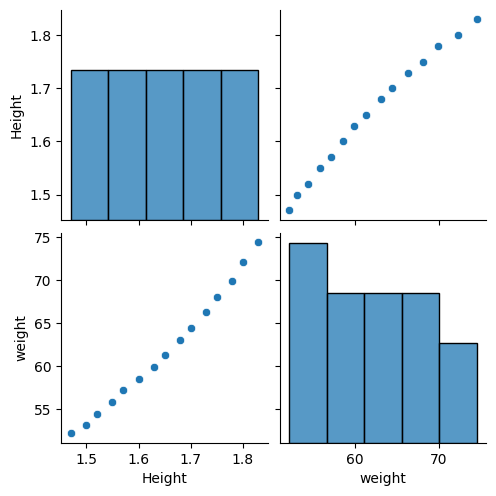

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
X=df[['weight']]
y=df['Height']
print(X.shape)
print(y.shape)

(15, 1)
(15,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
slope=regressor.coef_
print(slope)

[0.10138121]


In [12]:
intercept=regressor.intercept_
print(intercept)

1.6399999999999997


In [13]:
y_pred=regressor.predict(X_train)

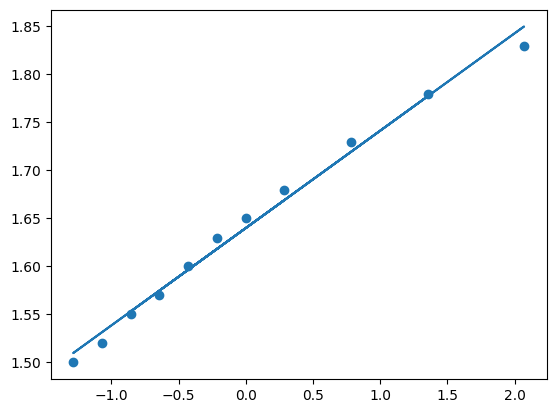

In [14]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred)

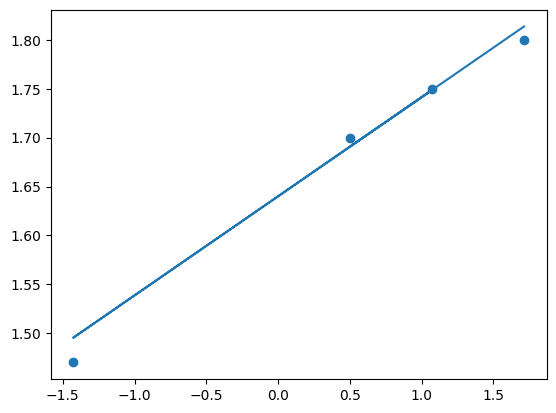

In [15]:
y_pred_test=regressor.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print(f"Mean Absolute error:{mae}")
print(f"Mean squared error:{mse}")
print(f"Root Mean squared error:{rmse}")
print(f"r2_score:{r2}")

Mean Absolute error:0.012441511361401869
Mean squared error:0.00022877823247597986
Root Mean squared error:0.015125416770323384
r2_score:0.9856565371488414


In [17]:
new_pred=regressor.predict(scaler.transform([[50]]))
new_pred

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.46001717])

In [18]:
df1=pd.read_csv("loan.csv")# take any dataset for example i took this one take any another okay
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
df.describe()

,Height,weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [21]:
df1.shape

(614, 13)

In [22]:
df1.iloc[5]

Loan_ID              LP001011
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed             Yes
ApplicantIncome          5417
CoapplicantIncome      4196.0
LoanAmount              267.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 5, dtype: object

In [23]:
df1.loc[5]

Loan_ID              LP001011
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed             Yes
ApplicantIncome          5417
CoapplicantIncome      4196.0
LoanAmount              267.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 5, dtype: object

In [24]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df1.fillna({'Married':"NA"},inplace=True)

In [26]:
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
df2=pd.read_csv("student_data_synthetic_extreme_noisy.csv")
df2.head()

,Marks 1,Marks 2,Admission
0,92.934283,79.481679,1
1,51.234714,56.298354,0
2,74.953771,53.461560,1
3,68.460597,50.233526,0
4,78.316933,83.619990,1


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks 1    50 non-null     float64
 1   Marks 2    50 non-null     float64
 2   Admission  50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [30]:
feature_cols=['Marks 1','Marks 2']
X=df2[feature_cols]
y=df2.Admission

In [31]:
class_counts=df2["Admission"].value_counts()
print(class_counts)

Admission
1    35
0    15
Name: count, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

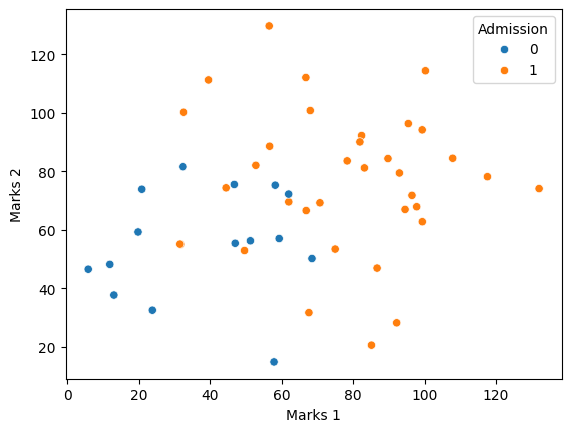

In [32]:
import seaborn as sns
sns.scatterplot(x=df2["Marks 1"],y=df2["Marks 2"], hue=df2["Admission"])

In [33]:
print(X.head())

     Marks 1    Marks 2
0  92.934283  79.481679
1  51.234714  56.298354
2  74.953771  53.461560
3  68.460597  50.233526
4  78.316933  83.619990


In [34]:
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Admission, dtype: int64


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [36]:
X.shape

(50, 2)

In [37]:
m1=LogisticRegression(class_weight='balanced',penalty='l2',solver='lbfgs',max_iter=1000)

In [38]:
m1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
m1.score(X_test,y_test)

0.9230769230769231

In [40]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(m1,X,y, cv=5)
print("Cross-validation:",np.mean(cv_scores))

Cross-validation: 0.78


In [41]:
y_pred=m1.predict(X_test)
y_test

17    0
2     1
20    1
31    1
24    1
1     0
12    0
8     1
11    1
34    1
33    1
43    0
13    1
Name: Admission, dtype: int64

In [42]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [43]:
new_pred=m1.predict([[60,70]])
new_pred

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [45]:
c1 = metrics.confusion_matrix(y_test, y_pred)
print(c1)
print("actual correct matrix")
tp=c1[1][1]
tn=c1[0][0]
fp=c1[0][1]
fn=c1[1][0]
print(np.array([tn,fp,fn,tp]))


[[4 0]
 [1 8]]
actual correct matrix
[4 0 1 8]


In [46]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("REcall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9230769230769231
Precision: 1.0
REcall: 0.8888888888888888


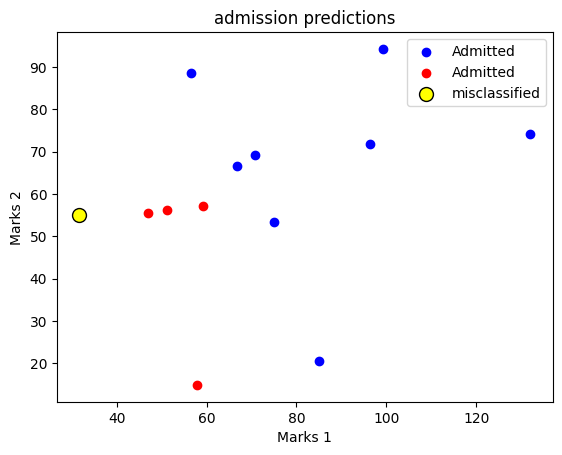

In [47]:
plt.scatter(X_test[y_pred==1]['Marks 1'],X_test[y_pred==1]['Marks 2'],color='blue',label='Admitted')
plt.scatter(X_test[y_pred==0]['Marks 1'],X_test[y_pred==0]['Marks 2'],color='red',label='Admitted')
misclassified=(y_test!=y_pred)
plt.scatter(X_test[misclassified]['Marks 1'],X_test[misclassified]['Marks 2'],color='yellow',edgecolor='k',s=100,label='misclassified')
plt.xlabel('Marks 1')
plt.ylabel('Marks 2')
plt.title("admission predictions")
plt.legend()
plt.show()

In [48]:
import numpy as np

In [49]:
array1=np.array([1,2,3])
array1

array([1, 2, 3])

In [50]:
print("Data type of the array1:-",type(array1))

Data type of the array1:- <class 'numpy.ndarray'>


In [59]:
array2d_1=np.array([[1,2,3],[4,5,6]])
array2d_2=np.array([[7,8,9],[4,3,2]])
sum_array=array2d_1+array2d_2
print("\n First array:-\n",array2d_1)
print("\n Second array:-\n",array2d_2)
print("\n Sum of arrays:-\n",sum_array)



 First array:-
 [[1 2 3]
 [4 5 6]]

 Second array:-
 [[7 8 9]
 [4 3 2]]

 Sum of arrays:-
 [[ 8 10 12]
 [ 8  8  8]]


In [60]:
concat_rows=np.concatenate([array2d_1,array2d_2],axis=0)
concat_columns=np.concatenate([array2d_1,array2d_2],axis=1)
concat_rows
concat_columns

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 4, 3, 2]])

In [61]:
flattened_rows=concat_rows.flatten()
flattened_rows

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 3, 2])

In [62]:
identity_matrix = np.identity(3)
print("\n3x3 Identity Matrix:\n", identity_matrix)
print("Shape of Identity Matrix:", identity_matrix.shape)
print("Number of Dimensions:", identity_matrix.ndim)
print("Data Type:", identity_matrix.dtype)


3x3 Identity Matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Shape of Identity Matrix: (3, 3)
Number of Dimensions: 2
Data Type: float64


In [76]:
cars=pd.read_csv("export_cars.csv")
cars

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [77]:
cars.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [78]:
cars.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [79]:
cars.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [80]:
cars.shape

(10, 5)

In [86]:
cars.describe()

,Odometer (KM),Doors,Price
count,10.000000,10.000000,10.000000
mean,78601.400000,4.000000,7645.000000
std,61983.471735,0.471405,5379.407753
min,11179.000000,3.000000,3500.000000
25%,35836.250000,4.000000,4625.000000
50%,57369.000000,4.000000,6625.000000
75%,96384.500000,4.000000,7375.000000
max,213095.000000,5.000000,22000.000000


In [87]:
cars['Price'] = cars['Price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10392\4210653214.py:1: SyntaxWarning: invalid escape sequence '\$'
  cars['Price'] = cars['Price'].replace('[\$,]', '', regex=True).astype(float)


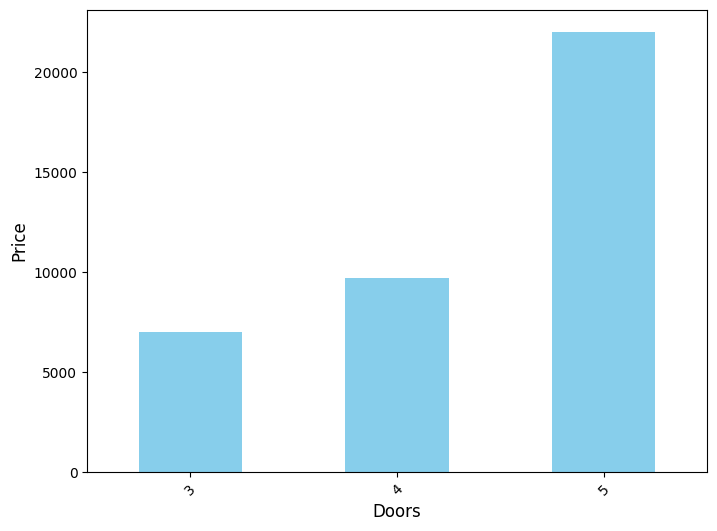

In [88]:
import matplotlib.pyplot as plt
Doors=cars.groupby('Doors')['Price'].max()
plt.figure(figsize=(8,6))
Doors.plot(kind='bar',color='skyblue')
plt.xlabel("Doors",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [89]:
import numpy as np

In [92]:
zeros_array=np.zeros((2,4))
ones_array=np.ones((4,2))
ones_array

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [93]:
zeros_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [94]:
print("\nZeros Array - Shape:", zeros_array.shape, 
      "Dimensions:", zeros_array.ndim, 
      "Datatype:", zeros_array.dtype)
print("Ones Array - Shape:", ones_array.shape, 
      "Dimensions:", ones_array.ndim, 
      "Datatype:", ones_array.dtype)


Zeros Array - Shape: (2, 4) Dimensions: 2 Datatype: float64
Ones Array - Shape: (4, 2) Dimensions: 2 Datatype: float64


In [95]:
ones_1d=ones_array.flatten()
ones_1d

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
ones_reshaped=ones_1d.reshape((2,4))
ones_reshaped

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [99]:
array_4d = np.arange(16).reshape(2, 2, 2, 2)
print("\nOriginal 4D array (int):\n", array_4d)
array_4d_float = array_4d.astype(float)
print("\n4D array with elements converted to float:\n", array_4d_float)


Original 4D array (int):
 [[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]

4D array with elements converted to float:
 [[[[ 0.  1.]
   [ 2.  3.]]

  [[ 4.  5.]
   [ 6.  7.]]]


 [[[ 8.  9.]
   [10. 11.]]

  [[12. 13.]
   [14. 15.]]]]
